# Analyze Data

In [1]:
%run ingestion.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   facility      810 non-null    object 
 1   date          481 non-null    object 
 2   timeStart     810 non-null    object 
 3   timeEnd       481 non-null    object 
 4   supplierCode  481 non-null    object 
 5   suppliedM3    810 non-null    float64
 6   recoveredM3   810 non-null    float64
 7   processTime   329 non-null    object 
 8   supplier      329 non-null    object 
dtypes: float64(2), object(7)
memory usage: 57.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   facility_code     810 non-null    int64         
 1   supplier_code     810 non-null    int64         
 2   process_date      810 non-null    int64     

---
# Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import (
    scatter_matrix
)

---
# Data

In [3]:
df

,facility_code,supplier_code,process_date,start_date_time,start_hour,start_time_sin_x,start_time_cos_y,dayofweek,dayofweek_sin_x,dayofweek_cos_y,is_holiday,process_time,input,output,throughput,recovery_rate
0,0,4,1,2022-08-01 08:29:00,8,0.796002,-0.605294,0,0.000000,1.000000,0,2280.0,2.00,1.55,0.040789,0.775000
1,0,5,1,2022-08-01 09:27:00,9,0.619094,-0.785317,0,0.000000,1.000000,0,7260.0,6.80,4.15,0.034298,0.610294
2,0,4,1,2022-08-01 11:38:00,11,0.095846,-0.995396,0,0.000000,1.000000,0,2580.0,1.95,1.55,0.036047,0.794872
3,0,6,1,2022-08-01 12:40:00,12,-0.173648,-0.984808,0,0.000000,1.000000,0,5040.0,3.95,2.55,0.030357,0.645570
4,0,5,1,2022-08-01 14:25:00,14,-0.591309,-0.806445,0,0.000000,1.000000,0,7440.0,5.30,3.10,0.025000,0.584906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,6,30,2022-09-30 11:40:00,11,0.087156,-0.996195,4,-0.433884,-0.900969,0,3660.0,3.70,2.35,0.038525,0.635135
806,0,5,30,2022-09-30 12:52:00,12,-0.224951,-0.974370,4,-0.433884,-0.900969,0,6240.0,6.35,4.55,0.043750,0.716535
807,1,0,30,2022-09-30 13:48:00,13,-0.453991,-0.891007,4,-0.433884,-0.900969,0,220.0,4.53,2.73,0.744545,0.602649
808,0,4,30,2022-09-30 15:02:00,15,-0.713251,-0.700909,4,-0.433884,-0.900969,0,2400.0,2.00,1.45,0.036250,0.725000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   facility_code     810 non-null    int64         
 1   supplier_code     810 non-null    int64         
 2   process_date      810 non-null    int64         
 3   start_date_time   810 non-null    datetime64[ns]
 4   start_hour        810 non-null    int64         
 5   start_time_sin_x  810 non-null    float32       
 6   start_time_cos_y  810 non-null    float32       
 7   dayofweek         810 non-null    int64         
 8   dayofweek_sin_x   810 non-null    float64       
 9   dayofweek_cos_y   810 non-null    float64       
 10  is_holiday        810 non-null    uint8         
 11  process_time      810 non-null    float32       
 12  input             810 non-null    float32       
 13  output            810 non-null    float32       
 14  throughput        810 non-

In [5]:
df.describe()

,facility_code,supplier_code,process_date,start_hour,start_time_sin_x,start_time_cos_y,dayofweek,dayofweek_sin_x,dayofweek_cos_y,is_holiday,process_time,input,output,throughput,recovery_rate
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.406173,3.576543,15.865432,11.332099,0.046882,-0.781740,2.767901,0.075185,-0.026631,0.224691,3913.073975,4.109407,2.805049,0.801889,0.690545
std,0.491421,1.991873,8.785054,2.579194,0.597805,0.172604,1.914219,0.693152,0.717222,0.417637,4159.885742,1.387956,0.944784,1.081123,0.085600
min,0.000000,0.000000,1.000000,8.000000,-0.894934,-1.000000,0.000000,-0.974928,-0.900969,0.000000,35.000000,1.900000,1.200000,0.009524,0.415584
25%,0.000000,2.000000,8.000000,9.000000,-0.518773,-0.952396,1.000000,-0.433884,-0.900969,0.000000,115.000000,3.012500,2.110000,0.025297,0.635354
50%,0.000000,4.000000,16.000000,11.000000,0.063226,-0.801254,3.000000,0.000000,-0.222521,0.000000,2760.000000,4.150000,2.835000,0.038197,0.698286
75%,1.000000,5.000000,24.000000,14.000000,0.646124,-0.598325,4.000000,0.781831,0.623490,0.000000,6465.000000,5.050000,3.520000,1.526667,0.750000
max,1.000000,6.000000,31.000000,16.000000,0.843391,-0.446198,6.000000,0.974928,1.000000,1.000000,17820.000000,7.000000,5.500000,4.422857,0.873418


In [6]:
df[df.isna().any(axis=1)]

,facility_code,supplier_code,process_date,start_date_time,start_hour,start_time_sin_x,start_time_cos_y,dayofweek,dayofweek_sin_x,dayofweek_cos_y,is_holiday,process_time,input,output,throughput,recovery_rate


In [7]:
df[COLUMN_SUPPLIER_CODE].value_counts(ascending=True) / len(df)

1    0.092593
2    0.095062
3    0.104938
0    0.113580
4    0.191358
5    0.201235
6    0.201235
Name: supplier_code, dtype: float64

In [8]:
df[COLUMN_FACILITY_CODE].value_counts() / len(df)

0    0.593827
1    0.406173
Name: facility_code, dtype: float64

In [9]:
df[COLUMN_IS_HOLIDAY].value_counts() / len(df)

0    0.775309
1    0.224691
Name: is_holiday, dtype: float64

In [10]:
df[COLUMN_START_HOUR].value_counts(sort="ascending") / len(df)

8     0.220988
14    0.112346
15    0.112346
11    0.108642
13    0.108642
12    0.102469
9     0.098765
10    0.098765
16    0.037037
Name: start_hour, dtype: float64

In [11]:
sorted(df[COLUMN_START_HOUR].unique())

[8, 9, 10, 11, 12, 13, 14, 15, 16]

In [12]:
df[COLUMN_PROCESS_TIME].max() / 3600 # hours

4.95

In [13]:
df[COLUMN_PROCESS_TIME].mean() / 3600 # hours

1.0869649929470486

In [14]:
df[df[COLUMN_PROCESS_TIME] < 60].shape[0]  # How come finish less than 1 min?

49

## Note
* Start hour is between 8AM to 4PM.
* Average processing time is approx 1h, max 5h. Hence no processing exceeds to the next day.
* The facilities open 7 days a week.
* There were processing finished within 1 min. Need to clarify the reason why they were so short. (outlier)

---
# Analysis

## Histgram per column

array([[<AxesSubplot: title={'center': 'facility_code'}>,
        <AxesSubplot: title={'center': 'supplier_code'}>,
        <AxesSubplot: title={'center': 'process_date'}>,
        <AxesSubplot: title={'center': 'start_date_time'}>],
       [<AxesSubplot: title={'center': 'start_hour'}>,
        <AxesSubplot: title={'center': 'start_time_sin_x'}>,
        <AxesSubplot: title={'center': 'start_time_cos_y'}>,
        <AxesSubplot: title={'center': 'dayofweek'}>],
       [<AxesSubplot: title={'center': 'dayofweek_sin_x'}>,
        <AxesSubplot: title={'center': 'dayofweek_cos_y'}>,
        <AxesSubplot: title={'center': 'is_holiday'}>,
        <AxesSubplot: title={'center': 'process_time'}>],
       [<AxesSubplot: title={'center': 'input'}>,
        <AxesSubplot: title={'center': 'output'}>,
        <AxesSubplot: title={'center': 'throughput'}>,
        <AxesSubplot: title={'center': 'recovery_rate'}>]], dtype=object)

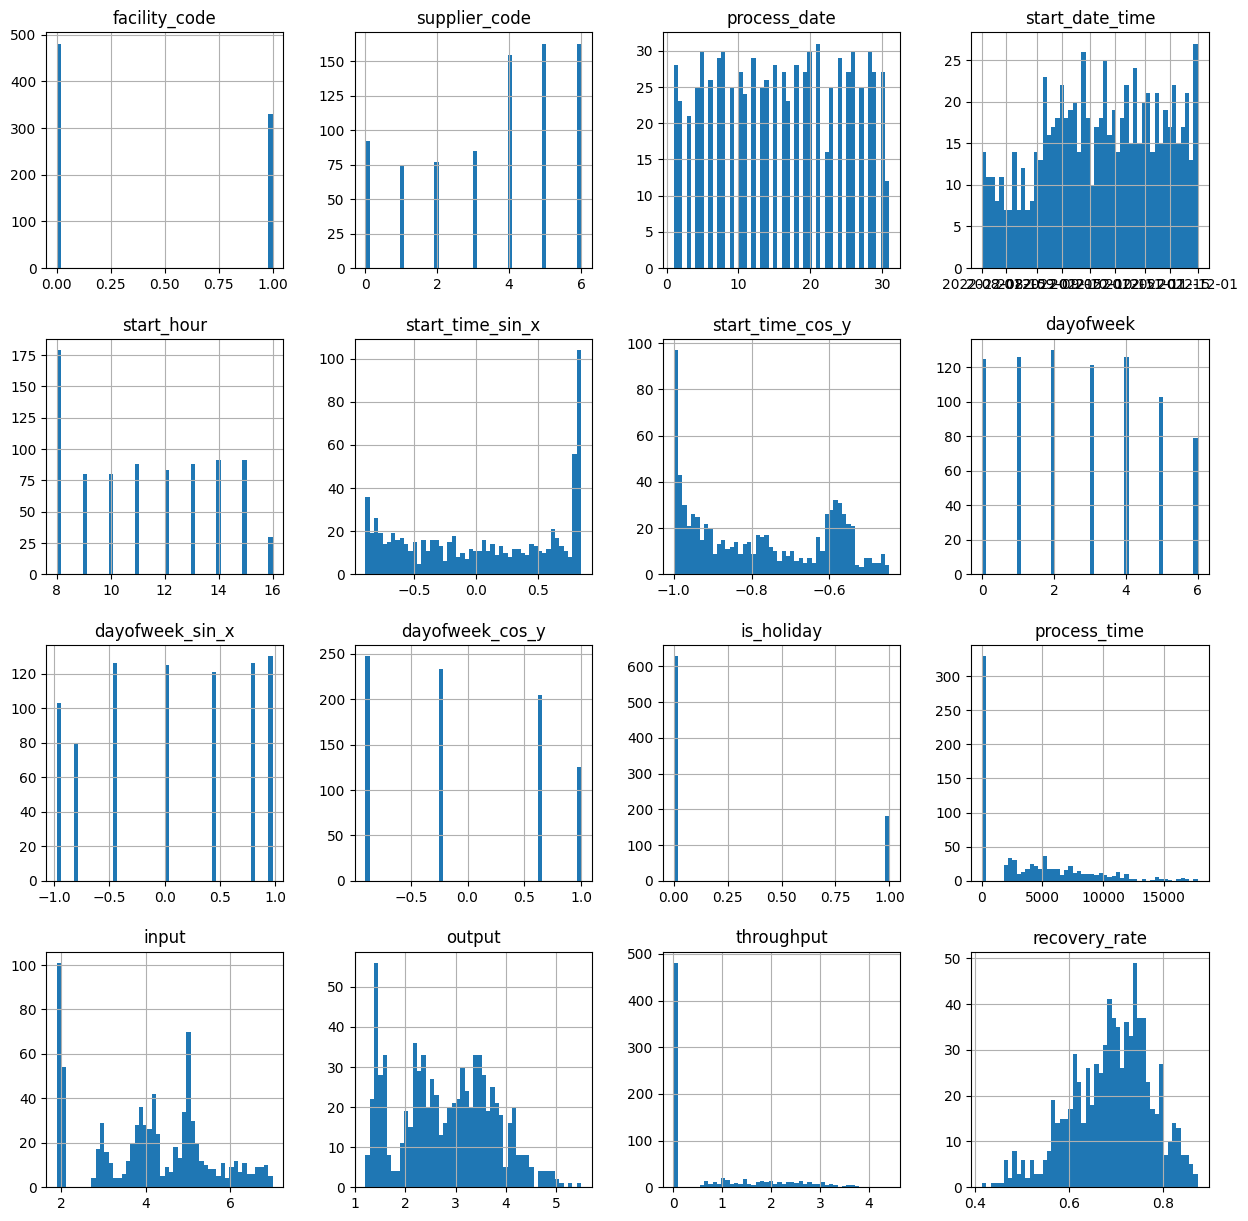

In [15]:
df.hist(bins=50, figsize=(15, 15))

## Correlations

1. Facility and Throughput have a strong correlation. Bundaberg that has higher performance.
2. Supplier and Throughput have a strong correlation becuase All Mary.x uses Bundaberg that has higher performance. Hence supplier has correlation with performance time as well.
3. Bundaberg has slightly better performance.
4. Throughput has little correlation with recovery rate. Even if processing can be slow, eventrually both facilities achieve recovery. 
5. Throughput has medium correlation with process time, which is less than expected.
6. Day, day of week, holiday have little correlation with performances.

* performance = throughput or recovery

In [16]:
correlations = df.corr()

/var/folders/_4/8v285hqs45xfzk0l1nlr3yq40000gn/T/ipykernel_7438/446670884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [17]:
for column_name in df.columns:
    if column_name not in [
        COLUMN_START_TIME, 
        COLUMN_END_TIME,
    ]:
        # print("-" * 80, end='')
        display(correlations[column_name].sort_values(ascending=False))

facility_code       1.000000
throughput          0.866242
recovery_rate       0.234719
output              0.176723
input               0.075345
start_time_sin_x    0.027445
process_date        0.019548
start_time_cos_y    0.014053
dayofweek           0.009672
is_holiday          0.006484
dayofweek_sin_x     0.000612
dayofweek_cos_y    -0.004644
start_hour         -0.025610
process_time       -0.754958
supplier_code      -0.874723
Name: facility_code, dtype: float64

supplier_code       1.000000
process_time        0.739652
input               0.096203
dayofweek           0.007259
is_holiday          0.000103
start_hour         -0.001225
start_time_sin_x   -0.002633
output             -0.003644
dayofweek_cos_y    -0.009659
dayofweek_sin_x    -0.027799
process_date       -0.029114
start_time_cos_y   -0.056900
recovery_rate      -0.261907
throughput         -0.751520
facility_code      -0.874723
Name: supplier_code, dtype: float64

process_date        1.000000
dayofweek_cos_y     0.050365
output              0.049801
recovery_rate       0.047617
input               0.031907
throughput          0.026569
facility_code       0.019548
start_hour          0.005684
process_time        0.004372
start_time_sin_x   -0.001275
start_time_cos_y   -0.003093
is_holiday         -0.007583
dayofweek_sin_x    -0.017766
dayofweek          -0.025161
supplier_code      -0.029114
Name: process_date, dtype: float64

start_hour          1.000000
is_holiday          0.041952
dayofweek           0.030153
dayofweek_cos_y     0.012132
process_date        0.005684
supplier_code      -0.001225
process_time       -0.017682
facility_code      -0.025610
dayofweek_sin_x    -0.031559
throughput         -0.048974
start_time_cos_y   -0.067963
input              -0.089466
output             -0.257938
recovery_rate      -0.449061
start_time_sin_x   -0.993510
Name: start_hour, dtype: float64

start_time_sin_x    1.000000
recovery_rate       0.450290
output              0.253525
start_time_cos_y    0.084955
input               0.083975
throughput          0.049987
dayofweek_sin_x     0.028198
facility_code       0.027445
process_time        0.013427
process_date       -0.001275
supplier_code      -0.002633
dayofweek_cos_y    -0.010549
dayofweek          -0.022467
is_holiday         -0.037793
start_hour         -0.993510
Name: start_time_sin_x, dtype: float64

start_time_cos_y    1.000000
start_time_sin_x    0.084955
recovery_rate       0.051898
throughput          0.038062
facility_code       0.014053
dayofweek_sin_x     0.013560
output             -0.000401
dayofweek_cos_y    -0.001794
process_time       -0.002420
process_date       -0.003093
is_holiday         -0.014751
dayofweek          -0.023365
input              -0.023533
supplier_code      -0.056900
start_hour         -0.067963
Name: start_time_cos_y, dtype: float64

dayofweek           1.000000
is_holiday          0.750273
start_hour          0.030153
process_time        0.015366
facility_code       0.009672
supplier_code       0.007259
input               0.006448
start_time_sin_x   -0.022467
start_time_cos_y   -0.023365
process_date       -0.025161
throughput         -0.041050
output             -0.050482
recovery_rate      -0.168062
dayofweek_cos_y    -0.467990
dayofweek_sin_x    -0.699100
Name: dayofweek, dtype: float64

dayofweek_sin_x     1.000000
recovery_rate       0.134284
output              0.090362
dayofweek_cos_y     0.051294
input               0.043335
throughput          0.043180
start_time_sin_x    0.028198
start_time_cos_y    0.013560
facility_code       0.000612
process_time       -0.010446
process_date       -0.017766
supplier_code      -0.027799
start_hour         -0.031559
dayofweek          -0.699100
is_holiday         -0.750941
Name: dayofweek_sin_x, dtype: float64

dayofweek_cos_y     1.000000
is_holiday          0.128682
dayofweek_sin_x     0.051294
process_date        0.050365
recovery_rate       0.024703
start_hour          0.012132
process_time        0.008818
throughput          0.001264
start_time_cos_y   -0.001794
facility_code      -0.004644
supplier_code      -0.009659
start_time_sin_x   -0.010549
output             -0.049871
input              -0.055662
dayofweek          -0.467990
Name: dayofweek_cos_y, dtype: float64

is_holiday          1.000000
dayofweek           0.750273
dayofweek_cos_y     0.128682
start_hour          0.041952
process_time        0.026322
facility_code       0.006484
supplier_code       0.000103
process_date       -0.007583
start_time_cos_y   -0.014751
start_time_sin_x   -0.037793
throughput         -0.050379
input              -0.052697
output             -0.128563
recovery_rate      -0.212465
dayofweek_sin_x    -0.750941
Name: is_holiday, dtype: float64

process_time        1.000000
supplier_code       0.739652
input               0.390651
output              0.262841
is_holiday          0.026322
dayofweek           0.015366
start_time_sin_x    0.013427
dayofweek_cos_y     0.008818
process_date        0.004372
start_time_cos_y   -0.002420
dayofweek_sin_x    -0.010446
start_hour         -0.017682
recovery_rate      -0.341238
throughput         -0.661105
facility_code      -0.754958
Name: process_time, dtype: float64

input               1.000000
output              0.930298
process_time        0.390651
supplier_code       0.096203
start_time_sin_x    0.083975
facility_code       0.075345
dayofweek_sin_x     0.043335
throughput          0.039027
process_date        0.031907
dayofweek           0.006448
start_time_cos_y   -0.023533
is_holiday         -0.052697
dayofweek_cos_y    -0.055662
start_hour         -0.089466
recovery_rate      -0.275432
Name: input, dtype: float64

output              1.000000
input               0.930298
process_time        0.262841
start_time_sin_x    0.253525
facility_code       0.176723
throughput          0.149140
dayofweek_sin_x     0.090362
recovery_rate       0.084698
process_date        0.049801
start_time_cos_y   -0.000401
supplier_code      -0.003644
dayofweek_cos_y    -0.049871
dayofweek          -0.050482
is_holiday         -0.128563
start_hour         -0.257938
Name: output, dtype: float64

throughput          1.000000
facility_code       0.866242
recovery_rate       0.265277
output              0.149140
start_time_sin_x    0.049987
dayofweek_sin_x     0.043180
input               0.039027
start_time_cos_y    0.038062
process_date        0.026569
dayofweek_cos_y     0.001264
dayofweek          -0.041050
start_hour         -0.048974
is_holiday         -0.050379
process_time       -0.661105
supplier_code      -0.751520
Name: throughput, dtype: float64

recovery_rate       1.000000
start_time_sin_x    0.450290
throughput          0.265277
facility_code       0.234719
dayofweek_sin_x     0.134284
output              0.084698
start_time_cos_y    0.051898
process_date        0.047617
dayofweek_cos_y     0.024703
dayofweek          -0.168062
is_holiday         -0.212465
supplier_code      -0.261907
input              -0.275432
process_time       -0.341238
start_hour         -0.449061
Name: recovery_rate, dtype: float64

In [18]:
attributes = [
    COLUMN_FACILITY_CODE,
    COLUMN_SUPPLIER_CODE,
#    COLUMN_PROCESS_DATE,
    COLUMN_START_HOUR, 
    COLUMN_WEEKDAY,
#    COLUMN_PROCESS_TIME,
    COLUMN_INPUT,
    COLUMN_OUTPUT,
    COLUMN_THROUGHPUT,
    COLUMN_RECOVERY_RATE,
]    

array([[<AxesSubplot: xlabel='facility_code', ylabel='facility_code'>,
        <AxesSubplot: xlabel='supplier_code', ylabel='facility_code'>,
        <AxesSubplot: xlabel='start_hour', ylabel='facility_code'>,
        <AxesSubplot: xlabel='dayofweek', ylabel='facility_code'>,
        <AxesSubplot: xlabel='input', ylabel='facility_code'>,
        <AxesSubplot: xlabel='output', ylabel='facility_code'>,
        <AxesSubplot: xlabel='throughput', ylabel='facility_code'>,
        <AxesSubplot: xlabel='recovery_rate', ylabel='facility_code'>],
       [<AxesSubplot: xlabel='facility_code', ylabel='supplier_code'>,
        <AxesSubplot: xlabel='supplier_code', ylabel='supplier_code'>,
        <AxesSubplot: xlabel='start_hour', ylabel='supplier_code'>,
        <AxesSubplot: xlabel='dayofweek', ylabel='supplier_code'>,
        <AxesSubplot: xlabel='input', ylabel='supplier_code'>,
        <AxesSubplot: xlabel='output', ylabel='supplier_code'>,
        <AxesSubplot: xlabel='throughput', ylabel='s

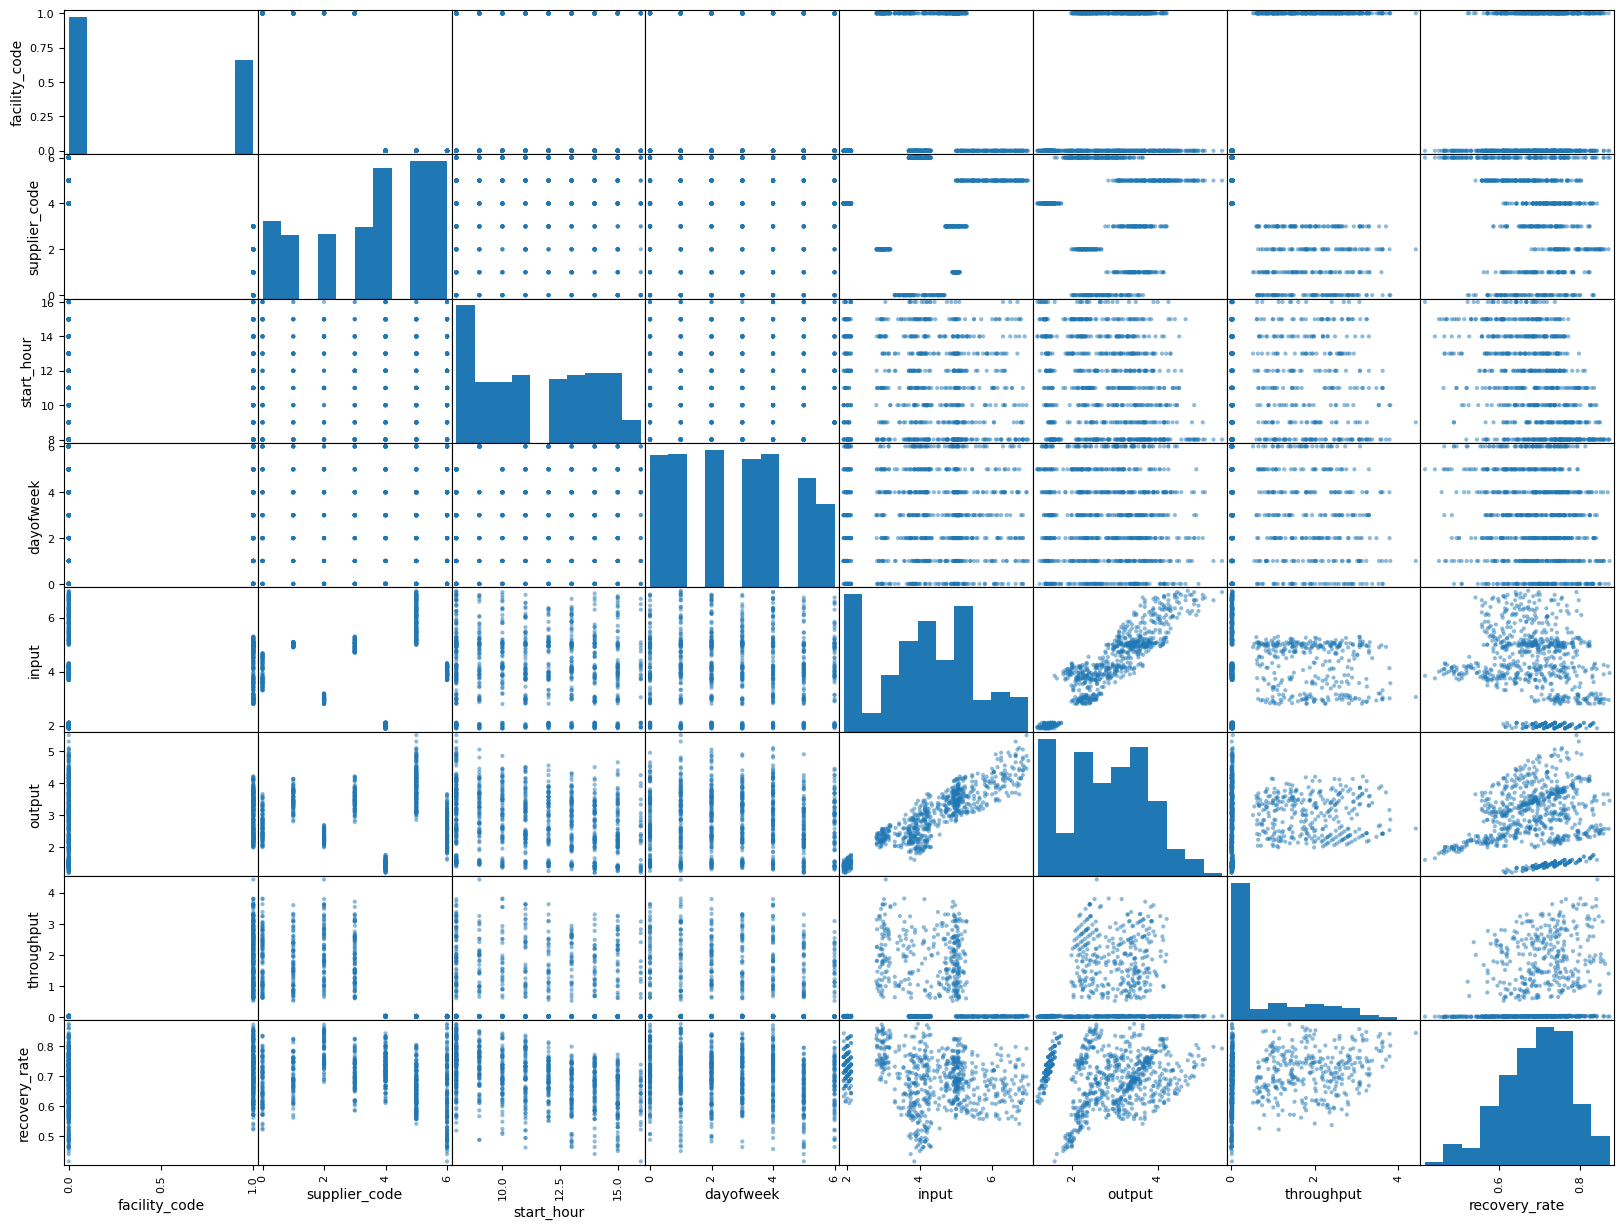

In [19]:
scatter_matrix(df[attributes], figsize=(20, 15))

---
# Performance


## Recovery Per Facility

Bundaberg/1 has higher (6%) recovery rate.

In [20]:
df.groupby(COLUMN_FACILITY_CODE)[COLUMN_RECOVERY_RATE].mean()

facility_code
0    0.673939
1    0.714824
Name: recovery_rate, dtype: float32

## Throughput per Facility

Bundaberg/1 has far better throughput.

In [21]:
df.groupby(COLUMN_FACILITY_CODE)[COLUMN_THROUGHPUT].mean()

facility_code
0    0.027834
1    1.933562
Name: throughput, dtype: float32

In [22]:
df.groupby([COLUMN_FACILITY_CODE])[COLUMN_PROCESS_TIME].mean()

facility_code
0    6508.814941
1     118.085106
Name: process_time, dtype: float32


### Per Facility/Supplier

All the Mary X use Bundaberg facility with higher performances.

In [23]:
df.groupby([COLUMN_FACILITY_CODE, COLUMN_SUPPLIER_CODE])[COLUMN_THROUGHPUT].mean()

facility_code  supplier_code
0              4                0.030302
               5                0.027365
               6                0.025957
1              0                1.896206
               1                1.810008
               2                2.158897
               3                1.878886
Name: throughput, dtype: float32

---
## Todo/Considerations

### Process Time

Reason for short process time e.g. less than 1 min and if it is normal. Nearly 150 recores out of 810 is less than 100 seconds.

array([[<AxesSubplot: title={'center': 'process_time'}>]], dtype=object)

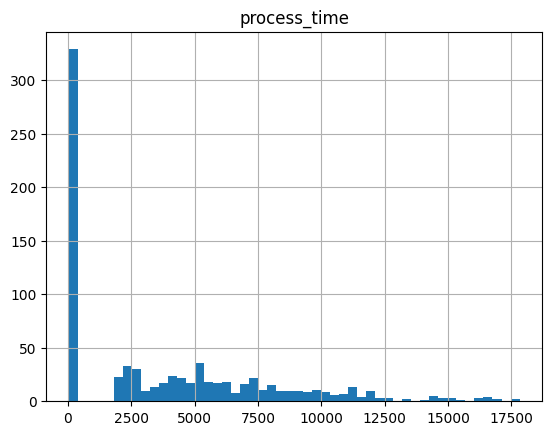

In [24]:
df[['process_time']].hist(bins=50)

### Recovery Rate
Reason for low recovery rate. If they are outliers to omit.

array([[<AxesSubplot: title={'center': 'recovery_rate'}>]], dtype=object)

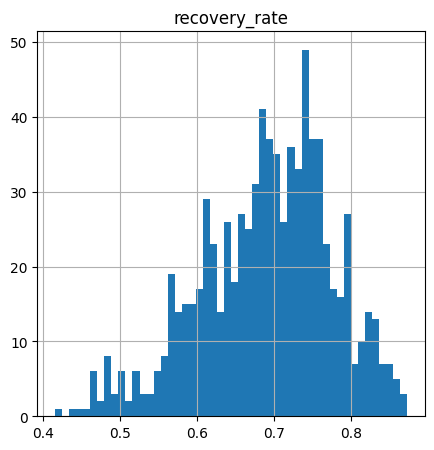

In [25]:
df[[COLUMN_RECOVERY_RATE]].hist(bins=50, figsize=(5, 5))